# Data Analysis

In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the training and testing data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
# Checking data for missing values

print("For train data-\n",train.isnull().sum())
print("\n")
print("For test data-\n",test.isnull().sum())

For train data-
 id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


For test data-
 id              0
comment_text    0
dtype: int64


The data doesn't have any missing values.
Now we need to check the number of words of the text.

In [4]:
train['comment_len'] = train['comment_text'].str.len() 

# describing the data
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_len
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,394.073221
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,590.720282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,435.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5000.000000


We observe that the length of comments ranges from 6 to 5000 but most of the comments have length near 200-500. 
Also, for comment length the mean is almost double the median which indicates that the data is positively skewed i.e., the tail is towards the right side of the number line. To understand it, let's explore more about the length of comments.

In [5]:
# sorting the data on the basis of increasing number of comment length.

train.sort_values(by=['comment_len'], inplace=True)
train = train.reset_index()
train = train.drop('index', axis = 1)

In [6]:
# let's see what the longest comment looks like

train['comment_text'][159570]

'CALTLAS IF YOU CONTINUE TO RVV IT, I WILL BLANK YOUR TALK PAGE, I WILL BLOCK YOU, I WILL BAN YOU, AND I WILL KILL YOUCALTLAS IF YOU CONTINUE TO RVV IT, I WILL BLANK YOUR TALK PAGE, I WILL BLOCK YOU, I WILL BAN YOU, AND I WILL KILL YOUCALTLAS IF YOU CONTINUE TO RVV IT, I WILL BLANK YOUR TALK PAGE, I WILL BLOCK YOU, I WILL BAN YOU, AND I WILL KILL YOUCALTLAS IF YOU CONTINUE TO RVV IT, I WILL BLANK YOUR TALK PAGE, I WILL BLOCK YOU, I WILL BAN YOU, AND I WILL KILL YOUCALTLAS IF YOU CONTINUE TO RVV IT, I WILL BLANK YOUR TALK PAGE, I WILL BLOCK YOU, I WILL BAN YOU, AND I WILL KILL YOUCALTLAS IF YOU CONTINUE TO RVV IT, I WILL BLANK YOUR TALK PAGE, I WILL BLOCK YOU, I WILL BAN YOU, AND I WILL KILL YOUCALTLAS IF YOU CONTINUE TO RVV IT, I WILL BLANK YOUR TALK PAGE, I WILL BLOCK YOU, I WILL BAN YOU, AND I WILL KILL YOUCALTLAS IF YOU CONTINUE TO RVV IT, I WILL BLANK YOUR TALK PAGE, I WILL BLOCK YOU, I WILL BAN YOU, AND I WILL KILL YOUCALTLAS IF YOU CONTINUE TO RVV IT, I WILL BLANK YOUR TALK PAGE,

It is basically a toxic which has abusive repeated words.

In [7]:
train['comment_text'][159505]

'SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY SUPER GAY

Looking into one more long comment, we see the same pattern. We conclude that either these are toxic or irrelevent and has repeated words which are making the comment texts positively skewed. Thus, we will apply data preprocessing and feature selection in the later section.

### Distribution of length of comments

In [8]:
count_df = pd.DataFrame(train['comment_len'].value_counts())
count_df = count_df.reset_index()
count_df

,index,comment_len
0,24,631
1,34,627
2,32,617
3,23,613
4,31,613
...,...,...
4041,3225,1
4042,4467,1
4043,4022,1
4044,2544,1


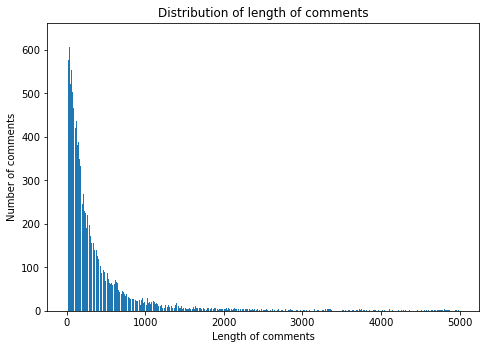

In [9]:
# plotting 

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(count_df['index'],count_df['comment_len'])

plt.title('Distribution of length of comments')
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')
plt.show()

As we concluded earlier, we can observe the decrease in number of comments with the increase in length of the comment

## Exploring the labels
### Distribution of number of comments of each category


In [10]:
toxic_df = train.drop(['id', 'comment_text', 'comment_len'], axis=1)

counts = []

categories = list(toxic_df.columns.values)

for i in categories:
    counts.append((i, toxic_df[i].sum()))
    
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
df_stats

,category,number_of_comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


Text(0.5, 0, 'category')

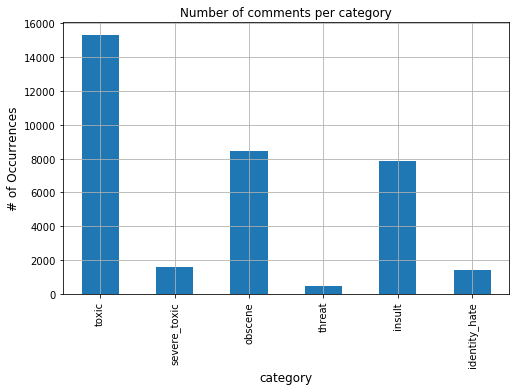

In [11]:
#plot 

df_stats.plot(x='category', y='number_of_comments', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of comments per category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)

### Distribution of multiple categories per comment

Text(0.5, 0, '# of categories')

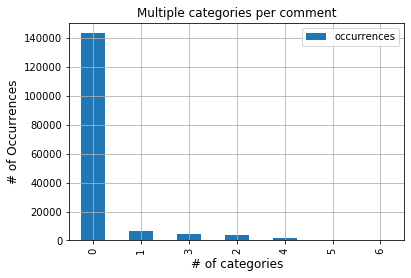

In [12]:
rowsums = train.iloc[:,2:8].sum(axis=1)

x = pd.DataFrame(rowsums.value_counts())
x = x.reset_index()
x.columns=['index', 'occurrences']

#plot
x.plot(x='index', y='occurrences', kind='bar', grid=True)
plt.title("Multiple categories per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of categories', fontsize=12)

We observe that maximum number of comments are not labelled but there are also comments which have multiple labels. So this is a multilabel, rather than multiclass classification.

## Preprocessing and cleaning of data

Data cleaning is one of the most important step because it removes irrelevant /duplicate values, handles missing data, expands contractions etc, which enhances the accuracy of the model. The various preprocessing steps which are used with this data are-
    
1. Remove html tags
2. Expand contractions
3. Remove stop words
4. Stem words
5. Normalize string
6. Remove punctuations
7. Remove whitespace

In [47]:
# BautifulSoup library

from bs4 import BeautifulSoup

def strip_html_tags(text):
    
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

In [48]:
# Expand contractions

import re

# Dictionary for saving common contracted words.
contractions = { 
"Can't":"cannot",
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

contractions_re = re.compile('(%s)' % '|'.join(contractions.keys()))
def expand_contractions(s, contractions_dict=contractions):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)


In [49]:
# Normalize the string

import unicodedata
import re

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

In [50]:
# Remove punctuation

import string
def remove_punctuation(s):
    np_punct="".join([c for c in s if c not in string.punctuation])
    return s

In [51]:
# Remove whitespace

def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())

In [52]:
# make sure you have nltk installed
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def stop_words(text):
    stop_words = set(stopwords.words('english'))
    # tokens of words  
    word_tokens = word_tokenize(text) #converts string into list of tokens(words)

    filtered_sentence = [] 

    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 

            
    return " ".join(filtered_sentence) #joining the list of tokens to form string


In [53]:
# Word stemming

from nltk.stem.porter import PorterStemmer

def word_stemmer(s):
    stemmer=PorterStemmer()
    stem_text=" ".join([stemmer.stem(i) for i in s])
    return s

In [54]:
def text_preprocessing(text):
    
    #text = strip_html_tags(text)
    text = expand_contractions(text)
    text = stop_words(text)
    text = word_stemmer(text)
    text = normalizeString(text)
    text = remove_punctuation(text)
    text = remove_whitespace(text)
    text = text.lower()
    
    return text

In [55]:
# printing the unpreprocessed text 

train['comment_text'][129000]

"Who ever said “everything that distinguishes the human line from the other great apes can be explained by a single event”? Certainly not me. All I’ve been doing is reacting to other editors who continually say there are better explanations than the AAH to explain human evolution. Alright, but what are these explanations? Whenever I ask I get nothing. And of course the AAH is falsifiable. You're getting confused because it's never been falsified (unlike the savanna theory, which has, and which proves that broad evolutionary theories can be)."

In [56]:
# calling function for preprocessing of train and test text

train['comment_text'] = [text_preprocessing(i) for i in train['comment_text']]
test['comment_text'] = [text_preprocessing(i) for i in test['comment_text']]

In [57]:
# printing the preprocessed text

train['comment_text'][129000]

'who ever said everything distinguishes human line great apes explained single event ? certainly . all i reacting editors continually say better explanations aah explain human evolution . alright explanations ? whenever i ask i get nothing . and course aah falsifiable . you re getting confused never falsified unlike savanna theory proves broad evolutionary theories .'

We can see a clear difference between unprocessed and preprocessed data but let's check if all the stopwords were removed or not.

In [58]:
freq = pd.Series(' '.join(train['comment_text']).split()).value_counts()[:20]
freq

.            638033
i            233507
!            105576
?             71692
article       57734
the           48417
s             48272
page          46539
wikipedia     46462
talk          37835
you           37822
would         35767
please        29730
one           29112
like          28003
if            26610
it            24763
see           21600
also          20618
think         20084
dtype: int64

In [59]:
# Removing some punctuations and words like the, s, if, it which weren't removed in earlier steps.

train['comment_text'] = train['comment_text'].str.replace('.',"")
train['comment_text'] = train['comment_text'].str.replace('i',"")
train['comment_text'] = train['comment_text'].str.replace('!',"")
train['comment_text'] = train['comment_text'].str.replace('s',"")
train['comment_text'] = train['comment_text'].str.replace('?',"")
train['comment_text'] = train['comment_text'].str.replace('if',"")
train['comment_text'] = train['comment_text'].str.replace('it',"")

In [60]:
# checking irrelevent words left in test data after preprocessing

freq = pd.Series(' '.join(test['comment_text']).split()).value_counts()[:20]
freq

.            542096
i            187402
!            179725
?             66181
article       48131
the           44493
s             42657
you           34727
wikipedia     34125
page          32769
would         30973
fuck          27258
like          24857
one           24561
it            23122
please        22133
if            21135
think         18442
see           17980
talk          16955
dtype: int64

In [61]:
# Removing some punctuations and words like the, s, if, it which weren't removed in earlier steps.

test['comment_text'] = test['comment_text'].str.replace('.',"")
test['comment_text'] = test['comment_text'].str.replace('!',"")
test['comment_text'] = test['comment_text'].str.replace('s',"")
test['comment_text'] = test['comment_text'].str.replace('?',"")
test['comment_text'] = test['comment_text'].str.replace('i',"")
test['comment_text'] = test['comment_text'].str.replace('the',"")
test['comment_text'] = test['comment_text'].str.replace('it',"")
test['comment_text'] = test['comment_text'].str.replace('if',"")

In [62]:
# saving the train and test preprocessed data for further use in deploying the models

train.to_csv('train_preprocessed.csv')
test.to_csv('test_preprocessed.csv')